In [1]:
'''
using linear regression to predict housing prices with features like area, bedrooms, furnishingstatus, mainroad locality,
guestrooms, parking, bathrooms, basement, stories, facilities like aircondintioning, water heating, pref area.
'''

'\nusing linear regression to predict housing prices with features like area, bedrooms, furnishingstatus, mainroad locality,\nguestrooms, parking, bathrooms, basement, stories, facilities like aircondintioning, water heating, pref area.\n'

In [2]:
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)
'''

'\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("yasserh/housing-prices-dataset")\n\nprint("Path to dataset files:", path)\n'

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [4]:
df = pd.read_csv("housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# for categorical data
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Simple Linear Regression

x -> area
y -> price

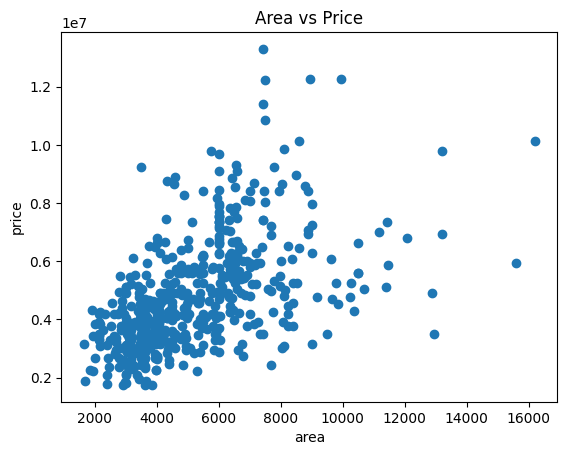

In [9]:
plt.scatter(df['area'],df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Area vs Price')
plt.show()

In [10]:
x = df.iloc[:,1:2]
y = df.iloc[:,0:1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error as mse, r2_score as r2
print('MSE: ', mse(y_test,y_pred))
print("R^2 score: ", r2(y_test, y_pred))

MSE:  3675286604768.185
R^2 score:  0.27287851871974644


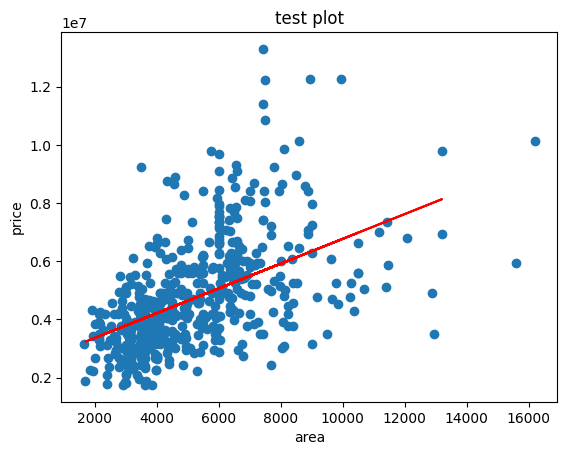

In [13]:
plt.scatter(df['area'], df['price'])
plt.title('test plot')
plt.xlabel("area")
plt.ylabel("price")
plt.plot(x_test, y_pred, color='r')
plt.show()

## Using KNN Regressor

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.2)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("MSE: ",mse(y_test,y_pred))
print("R2 score: ", r2(y_test, y_pred))

MSE:  3292721674182.0815
R2 score:  0.34856545389719795


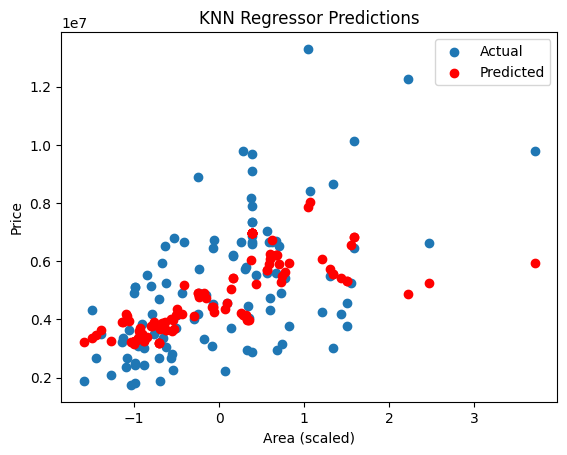

In [15]:
plt.scatter(x_test, y_test, label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel("Area (scaled)")
plt.ylabel("Price")
plt.title("KNN Regressor Predictions")
plt.legend()
plt.show()

# Multivariate LR

### converting yes/no to 1/0

In [16]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [17]:
for col in binary_cols:
    df[col] = df[col].str.lower().map({'yes': 1, 'no': 0})

### level encoding for furnishingstatus (furnished/semi-furnished/unfurnished)

In [18]:
dummies = pd.get_dummies(df['furnishingstatus'])
# Drop the last column
dummies = dummies.iloc[:, :-1]

df = pd.concat([df.drop('furnishingstatus', axis=1), dummies], axis=1)

In [19]:
'''
df.drop('semi-furnished',axis=1, inplace=True)

 {give lesser r^2 score}
'''

"\ndf.drop('semi-furnished',axis=1, inplace=True)\n\n {give lesser r^2 score}\n"

In [20]:
x = df.iloc[:, 1:]
y = df.iloc[:,0:1]

In [21]:
m = x.shape[0]

## model evaluation

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=50)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## metrics

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 910873.4187914671
R2 Score: 0.756035599462485


In [25]:
'''from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x,y,cv=5,scoring='r2')
print(scores)
print("Mean R^2: ", scores.mean())'''

'from sklearn.model_selection import cross_val_score\nscores = cross_val_score(lr, x,y,cv=5,scoring=\'r2\')\nprint(scores)\nprint("Mean R^2: ", scores.mean())'

In [26]:
'''
K-Fold -> cross vaidation technique
dataset split into k equal sized folds -> training (k-1) & testing (1)
performance metrics are averaged over all folds
'''

'\nK-Fold -> cross vaidation technique\ndataset split into k equal sized folds -> training (k-1) & testing (1)\nperformance metrics are averaged over all folds\n'

In [28]:

from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=8, shuffle=True, random_state=42)
scores = cross_val_score(lr, x, y, cv=cv, scoring='r2') #type: ignore

print("Scores per fold:", scores)
print("Mean R²:", np.mean(scores))

Scores per fold: [0.69079403 0.63524474 0.67428621 0.66533216 0.52567973 0.71607462
 0.58168993 0.64315828]
Mean R²: 0.6415324629664382


## plots for multivariate lr

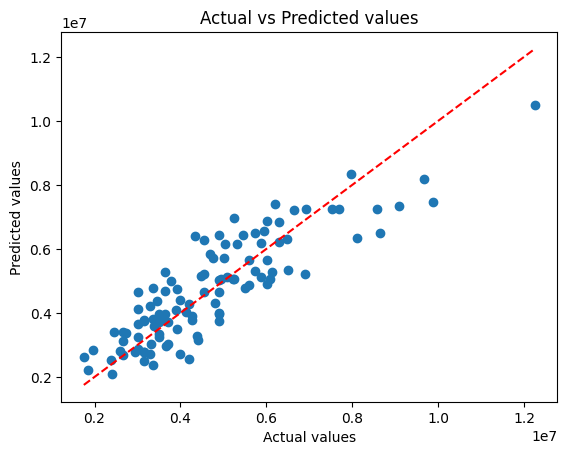

In [29]:
# actual vs predicted plot --> uses a 45º reference line --> indicates perfect predictions
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()



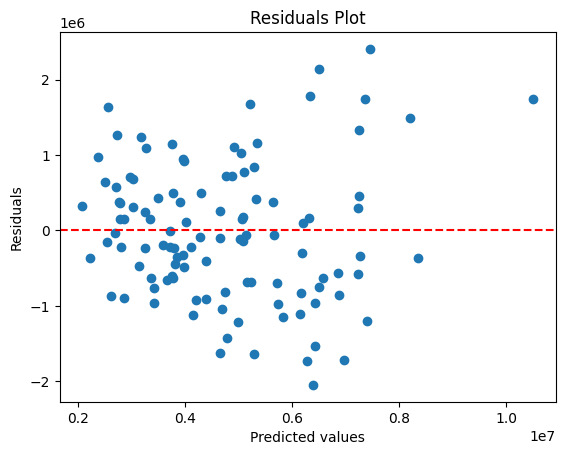

In [30]:
#residual plot --> checks errors(residuals) are randomly distributed --> detects heteroscedasticity (undesirable)
'''
points above the line -> underpredicted (ŷ < y)
points below the line -> overpredicted (ŷ > y)
random scatter around  the line -> homoscedastic, linear relationship -> good
patterns (funnel, curve, clusters) -> heteroscedastic, non-linear relationship -> bad
'''
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle ='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

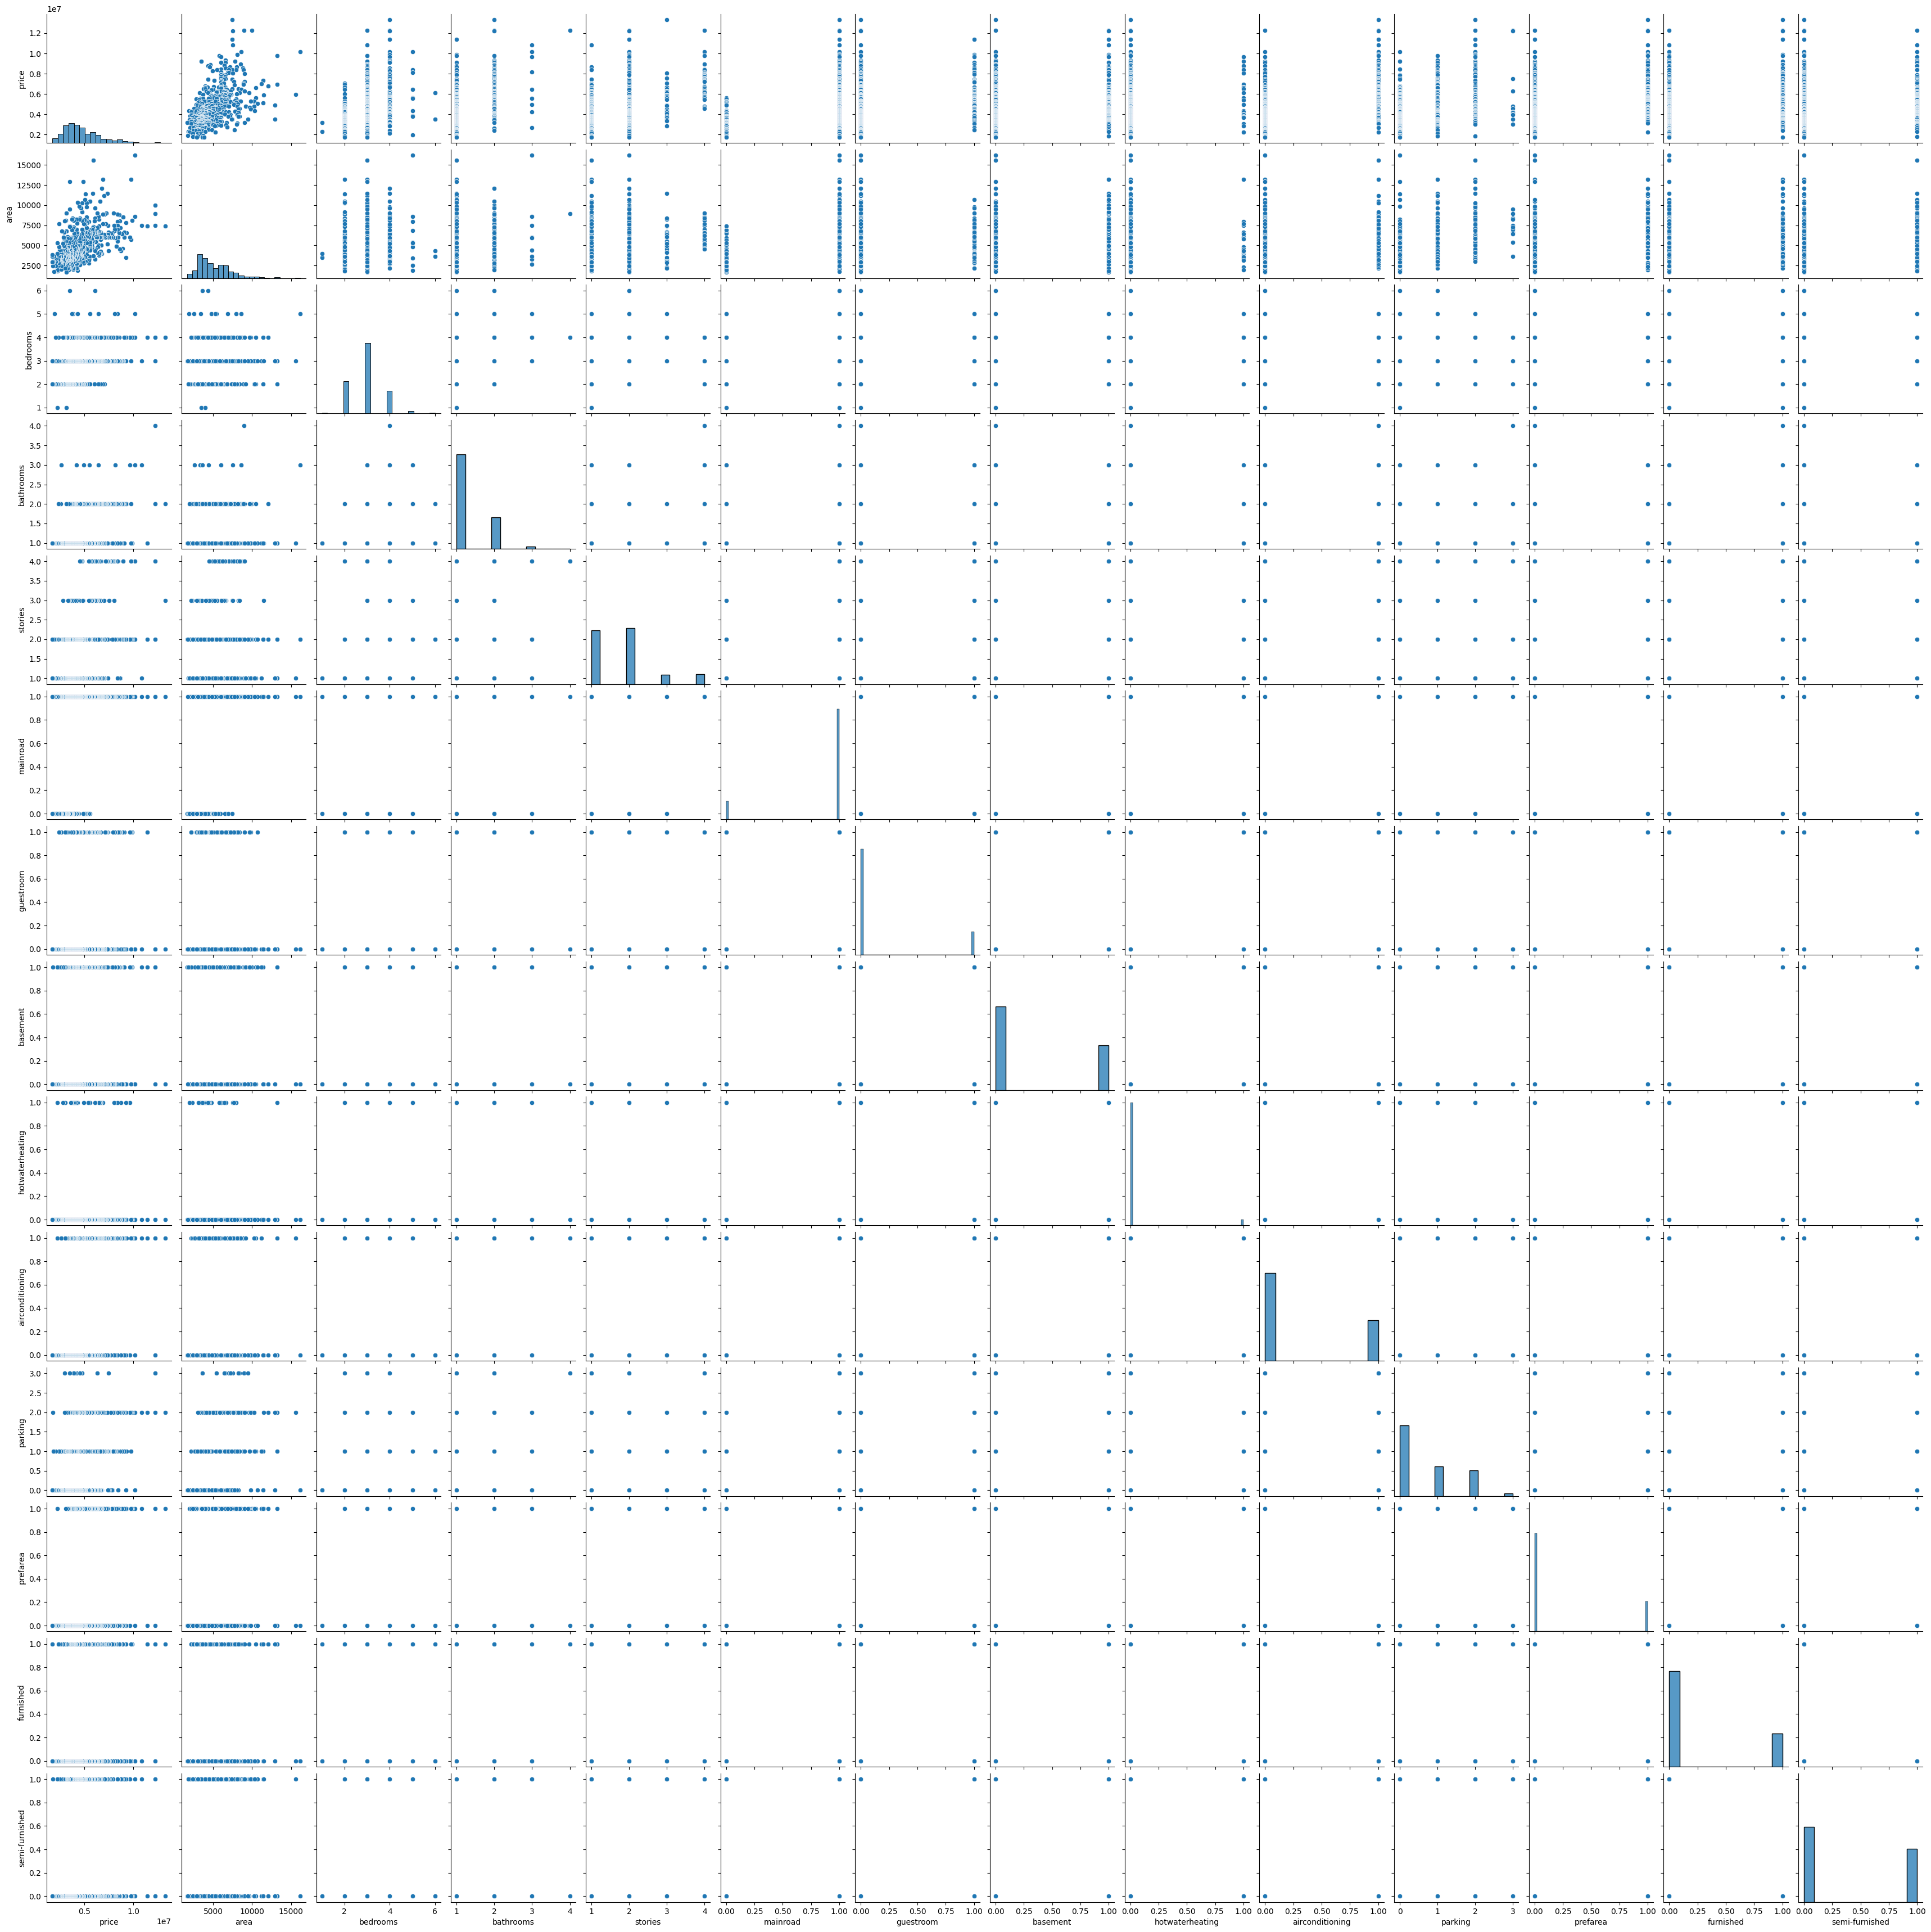

In [31]:
#pairplots --> scatter plots for each pair of features & target --> correlation before training model

sns.pairplot(df)

<Axes: >

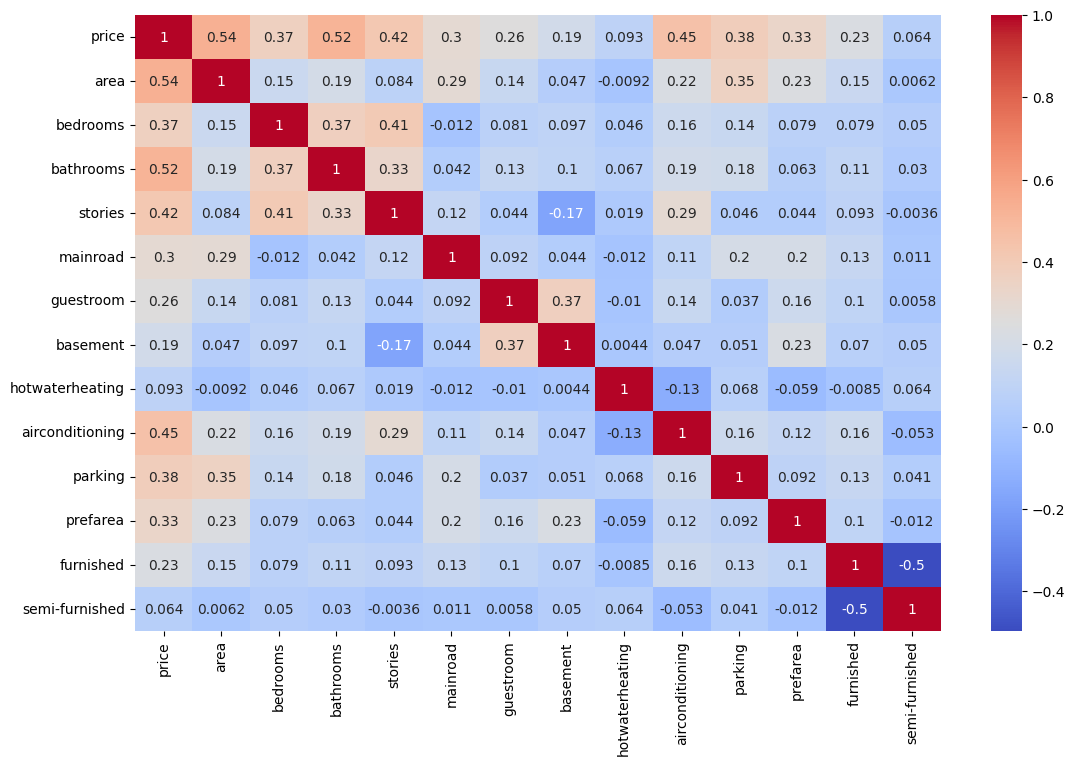

In [32]:
#heatmap of correlation --> b/w feature and target --> feature selection
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [33]:
df.to_csv("housing_cleaned.csv", index=False)